In this file I will be applying the rotated 2D flat topped Gaussian that I worked on in the file MAKING_GAUSSIAN_MODEL.

I will do it tilted and not tilted to compare the two and ensure the tilting is working!

In [1]:
%run run_all_intro_stuff.py

# Get Real Data

In [2]:
X, Y = np.meshgrid(np.arange(nx), np.arange(ny))

In [50]:
theta = major_angle_rad_cartesian

std_major = BMAJ_pix
std_minor = BMIN_pix

mean_major = RA_centre_pix
mean_minor = Dec_centre_pix

flat_end_major_pix = 4
flat_end_minor_pix = 4

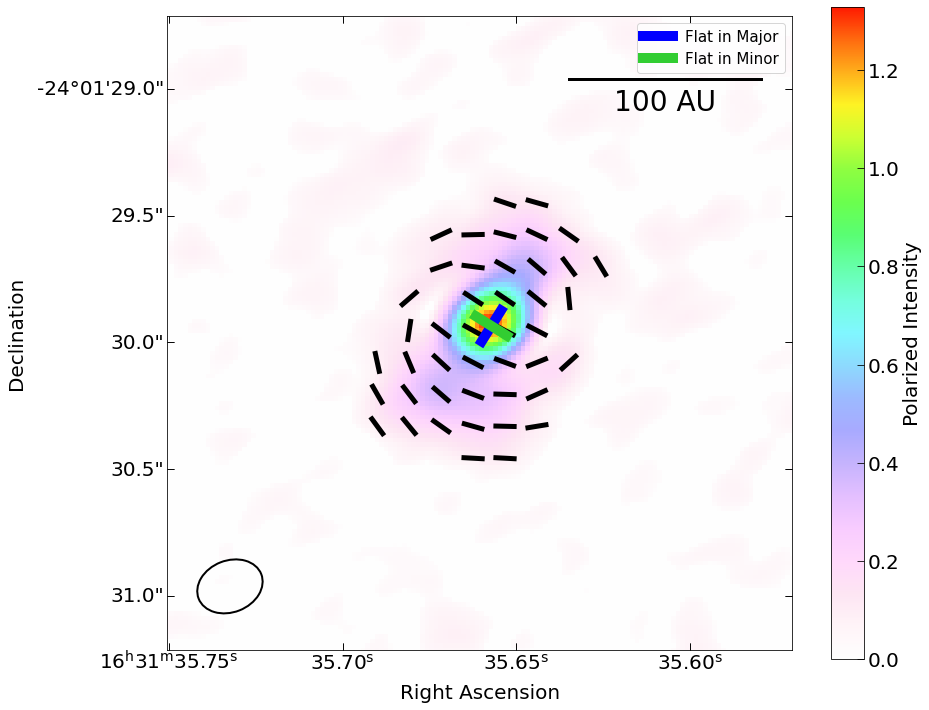

In [51]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity',  soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)


# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5)
    

# # Line showing theta
# # --------------------------------------------------------------------------------------------
# # Calculate the Cartesian coordinates for the line
# x = 20 * np.cos(theta)
# y = 20 * np.sin(theta)

# # Plot the line from (RA_centre_pix, Dec_centre_pix) to (RA_centre_pix + x, Dec_centre_pix + y)
# plt.plot([RA_centre_pix - x, RA_centre_pix + x], [Dec_centre_pix - y, Dec_centre_pix + y], 
#          color='red', 
#          lw=10, 
#          label = 'Tilted Angle')
# # --------------------------------------------------------------------------------------------


# Line showing flat area in major
# --------------------------------------------------------------------------------------------
# Calculate the Cartesian coordinates for the line
x_flat_major = flat_end_major_pix * np.cos(theta)
y_flat_major = flat_end_major_pix * np.sin(theta)

# Plot the line from (RA_centre_pix, Dec_centre_pix) to (RA_centre_pix + x, Dec_centre_pix + y)
plt.plot([RA_centre_pix - x_flat_major, RA_centre_pix + x_flat_major], 
         [Dec_centre_pix - y_flat_major, Dec_centre_pix + y_flat_major], 
         color='blue', 
         lw=10, 
         ls = '-',
         label = 'Flat in Major')
# --------------------------------------------------------------------------------------------

# Line showing flat area in minor
# --------------------------------------------------------------------------------------------
# Calculate the Cartesian coordinates for the line
x_flat_minor = flat_end_minor_pix * np.cos(theta + np.pi/2)
y_flat_minor = flat_end_minor_pix * np.sin(theta + np.pi/2)

# Plot the line from (RA_centre_pix, Dec_centre_pix) to (RA_centre_pix + x, Dec_centre_pix + y)
plt.plot([RA_centre_pix - x_flat_minor, RA_centre_pix + x_flat_minor], 
         [Dec_centre_pix - y_flat_minor, Dec_centre_pix + y_flat_minor], 
         color='limegreen', 
         lw=10, 
         ls = '-',
         label = 'Flat in Minor')
# --------------------------------------------------------------------------------------------



plt.legend(fontsize = legend_text_fs)


# Run Functions & Plot

In [52]:
GaussianUniformRatios_tilted, GaussianAzimuthalRatios_tilted, X_rot, Y_rot = gaussian_2d_flat_topped_tilted_model(X, Y, 
                                                                                                                  theta, 
                                                                                                                  std_major, std_minor, 
                                                                                                                  mean_major, mean_minor, 
                                                                                                                  flat_end_major_pix, flat_end_minor_pix)

In [53]:
GaussianUniformRatios,             GaussianAzimuthalRatios, X_rot0, Y_rot0       = gaussian_2d_flat_topped_tilted_model(X, Y, 0, std_major, std_minor, 
                                                                                                                  mean_major, mean_minor, 
                                                                                                                  flat_end_major_pix, flat_end_minor_pix)

# Tilted

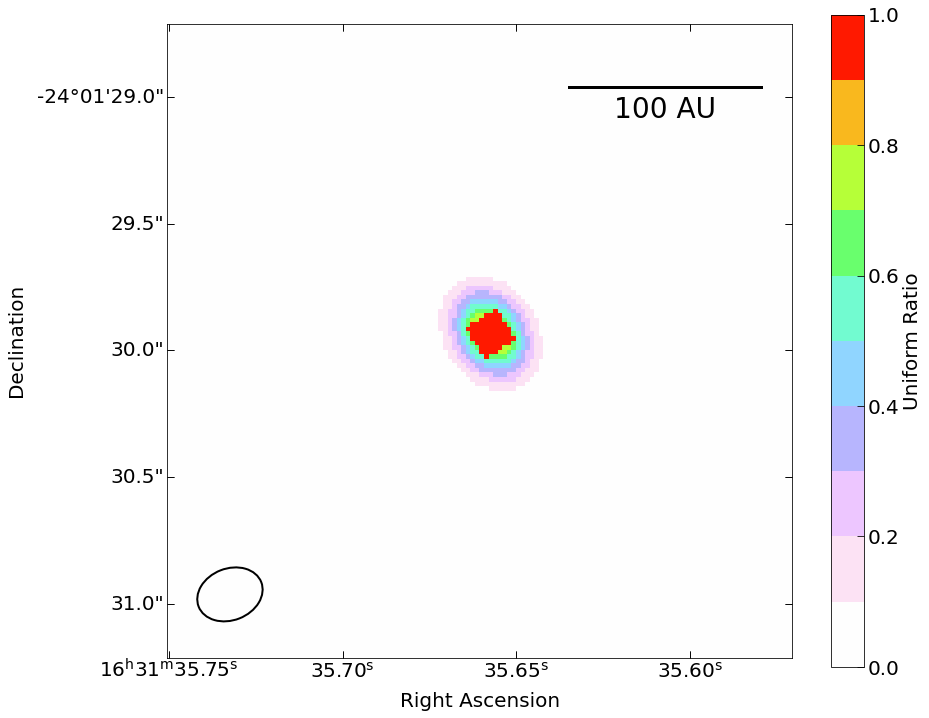

In [54]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, 
                                      GaussianUniformRatios_tilted, 'Uniform Ratio', 
                           soft_colormap_10, #soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)


# # Line showing flat area in major
# # --------------------------------------------------------------------------------------------
# # Calculate the Cartesian coordinates for the line
# x_flat_major = flat_end_major_pix * np.cos(theta)
# y_flat_major = flat_end_major_pix * np.sin(theta)

# # Plot the line from (RA_centre_pix, Dec_centre_pix) to (RA_centre_pix + x, Dec_centre_pix + y)
# plt.plot([RA_centre_pix - x_flat_major, RA_centre_pix + x_flat_major], 
#          [Dec_centre_pix - y_flat_major, Dec_centre_pix + y_flat_major], 
#          color='blue', 
#          lw=10, 
#          ls = '-',
#          label = 'Flat in Major')
# # --------------------------------------------------------------------------------------------

# # Line showing flat area in minor
# # --------------------------------------------------------------------------------------------
# # Calculate the Cartesian coordinates for the line
# x_flat_minor = flat_end_minor_pix * np.cos(theta + np.pi/2)
# y_flat_minor = flat_end_minor_pix * np.sin(theta + np.pi/2)

# # Plot the line from (RA_centre_pix, Dec_centre_pix) to (RA_centre_pix + x, Dec_centre_pix + y)
# plt.plot([RA_centre_pix - x_flat_minor, RA_centre_pix + x_flat_minor], 
#          [Dec_centre_pix - y_flat_minor, Dec_centre_pix + y_flat_minor], 
#          color='limegreen', 
#          lw=10, 
#          ls = '-',
#          label = 'Flat in Minor')
# # --------------------------------------------------------------------------------------------

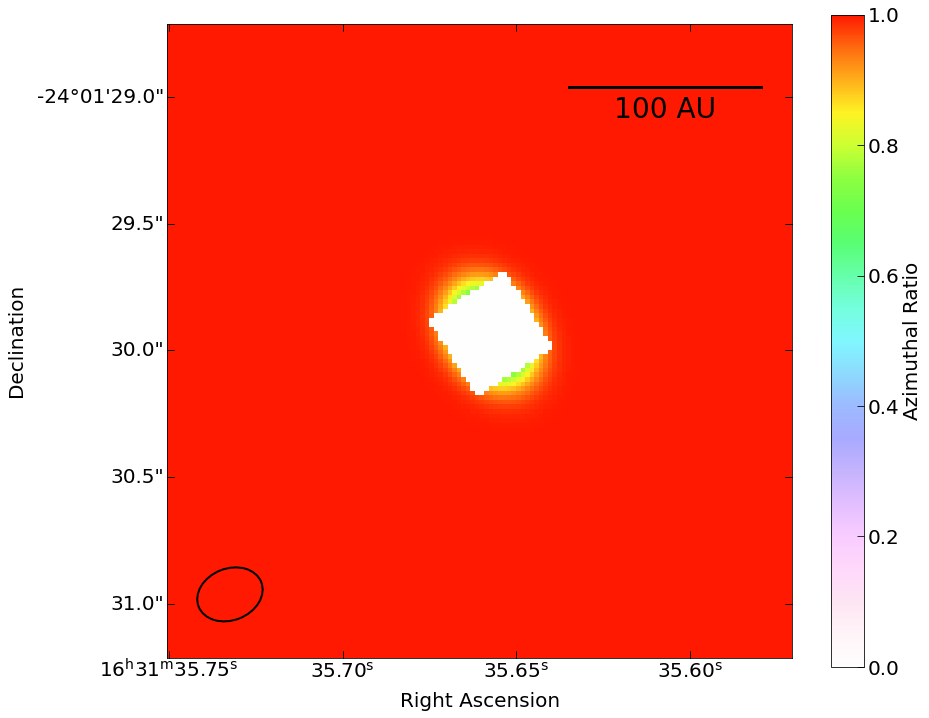

In [8]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianAzimuthalRatios_tilted, 'Azimuthal Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

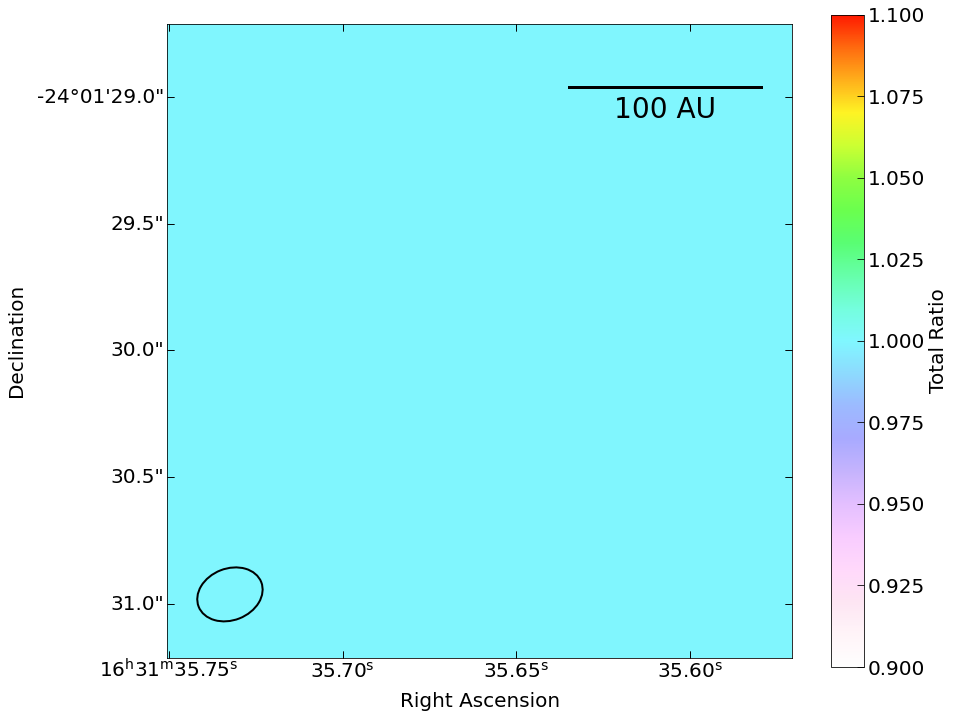

In [9]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianUniformRatios_tilted + GaussianAzimuthalRatios_tilted, 'Total Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Now resample Q, U and vector angle

In [10]:
PA_grid_gaussian_rad_astronomy, StokesQ_grid_gaussian, StokesU_grid_gaussian, vector_data_gaussian_cartesian, vector_gaussian_angle_rad_astronomy = mix_StokesQU_and_generate_vectors_gaussian(GaussianUniformRatios_tilted, GaussianAzimuthalRatios_tilted, 
                                                                                                                                                                            StokesQ_grid_100Uniform, 
                                                                                                                                                                            StokesU_grid_100Uniform,
                                                                                                                                                                            StokesQ_grid_100Azimuthal, 
                                                                                                                                                                            StokesU_grid_100Azimuthal,
                                                                                                                                                                              ny, nx, 
                                                                                                                                                                              step, vector_length_pix_const, 
                                                                                                                                                                              StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                                                                                                              calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
                                                                                                                                                                              PolarizationAngle_err_data_2d_deg)

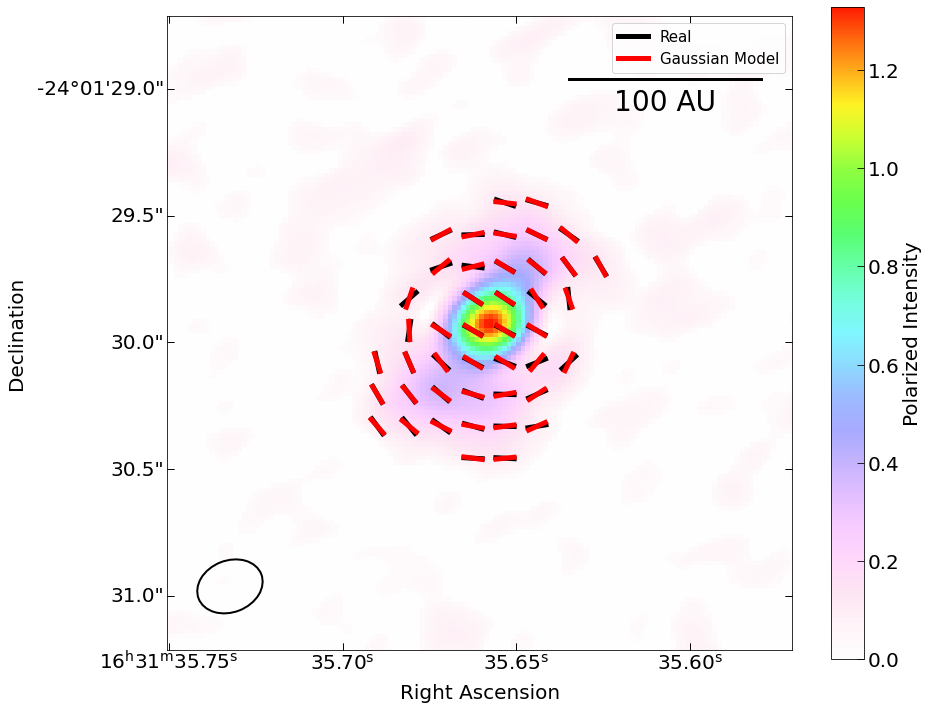

In [11]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity',  soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)


first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)



In [12]:
observed = vector_gaussian_angle_rad_astronomy
expected = vector_angle_actual_same_length_astronomy

chi_squared  = calculate_chi_squared_v2(observed, expected)
chi_squared

13.805183982761507

# Changing Range of Flat

In [29]:
flat_values = []
chi_values = []
vector_angles = []


# Dictionary to store results
results = {}

for flat_major_value in range(5, 20):
    for flat_minor_value in range(15): 
        
        # Get the flat major and minor values
        flat_values.append((flat_major_value, flat_minor_value))
        
        
        

        GaussianUniformRatios, GaussianAzimuthalRatios, X_rot, Y_rot = gaussian_2d_flat_topped_tilted_model(X, Y, 
                                                                                                            theta, 
                                                                                                            std_major, std_minor, 
                                                                                                            mean_major, mean_minor, 
                                                                                                            flat_major_value, flat_minor_value)




        PA_grid, StokesQ_grid, StokesU_grid, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors_gaussian(GaussianUniformRatios, GaussianAzimuthalRatios, 
                                                                                                                      StokesQ_grid_100Uniform, 
                                                                                                                      StokesU_grid_100Uniform,
                                                                                                                      StokesQ_grid_100Azimuthal, 
                                                                                                                      StokesU_grid_100Azimuthal,
                                                                                                                      ny, nx, 
                                                                                                                      step, vector_length_pix_const, 
                                                                                                                      StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                                                      calculated_polarized_intensity, 
                                                                                                                      PolarizedIntensity_err_data_2d_mJy,
                                                                                                                      PolarizationAngle_err_data_2d_deg)
        # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        # Create a key for the dictionary based on the values
        value_str = f"{int(flat_major_value)}{int(flat_minor_value)}"  
    
    
        # Save the results in the dictionary
        # results[f"PA_grid_{value_str}"] = PA_grid
        # results[f"StokesQ_grid_{value_str}"] = StokesQ_grid
        # results[f"StokesU_grid_{value_str}"] = StokesU_grid
        results[f"vectors_data_{value_str}"] = vectors_data
#         results[f"vectors_angle_{value_str}"] = vectors_angle
        # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
           
    
    
        # Calculate and append chi squared 
        observed = vectors_angle
        expected = vector_angle_actual_same_length_astronomy

        chi_squared = calculate_chi_squared_v2(observed, expected)
        
        chi_values.append(chi_squared)
        

In [30]:
# for i in range(len(flat_values)):
    
#     print(f'flat_major = {flat_values[i][0]} and flat_minor = {flat_values[i][1]}')


In [31]:
# Find the index of the minimum chi-squared value
min_index = chi_values.index(min(chi_values))


# Print the one with the lowest chi-squared value
print(f'The lowest chi-squared value is for flat_major = {flat_values[min_index][0]} and flat_minor = {flat_values[min_index][1]}: xi^2 = {chi_values[min_index]:.3f}')

The lowest chi-squared value is for flat_major = 10 and flat_minor = 14: xi^2 = 13.714


In [32]:
for i in range(len(flat_values)):
    
    print(f'flat_major = {flat_values[i][0]} and flat_minor = {flat_values[i][1]}: xi^2 = {chi_values[i]:.3f}')
      
# Print the one with the lowest chi-squared value
print(f'\nThe lowest chi-squared value is for flat_major = {flat_values[min_index][0]} and flat_minor = {flat_values[min_index][1]}: xi^2 = {chi_values[min_index]:.3f}')

flat_major = 5 and flat_minor = 0: xi^2 = 19.101
flat_major = 5 and flat_minor = 1: xi^2 = 19.101
flat_major = 5 and flat_minor = 2: xi^2 = 19.101
flat_major = 5 and flat_minor = 3: xi^2 = 19.092
flat_major = 5 and flat_minor = 4: xi^2 = 19.032
flat_major = 5 and flat_minor = 5: xi^2 = 19.032
flat_major = 5 and flat_minor = 6: xi^2 = 19.025
flat_major = 5 and flat_minor = 7: xi^2 = 19.025
flat_major = 5 and flat_minor = 8: xi^2 = 19.032
flat_major = 5 and flat_minor = 9: xi^2 = 19.032
flat_major = 5 and flat_minor = 10: xi^2 = 18.440
flat_major = 5 and flat_minor = 11: xi^2 = 18.440
flat_major = 5 and flat_minor = 12: xi^2 = 18.350
flat_major = 5 and flat_minor = 13: xi^2 = 18.350
flat_major = 5 and flat_minor = 14: xi^2 = 18.349
flat_major = 6 and flat_minor = 0: xi^2 = 19.101
flat_major = 6 and flat_minor = 1: xi^2 = 19.101
flat_major = 6 and flat_minor = 2: xi^2 = 19.101
flat_major = 6 and flat_minor = 3: xi^2 = 19.092
flat_major = 6 and flat_minor = 4: xi^2 = 19.032
flat_major = 6 

In [33]:
flat_values[min_index][0]

10

In [34]:
flat_values[min_index][1]

14

In [35]:
# Accessing the vector data from the dictionary using the formatted key
vector_data_gaussian_best = results[f"vectors_data_{int(flat_values[min_index][0]):02d}{int(flat_values[min_index][1]):02d}"]

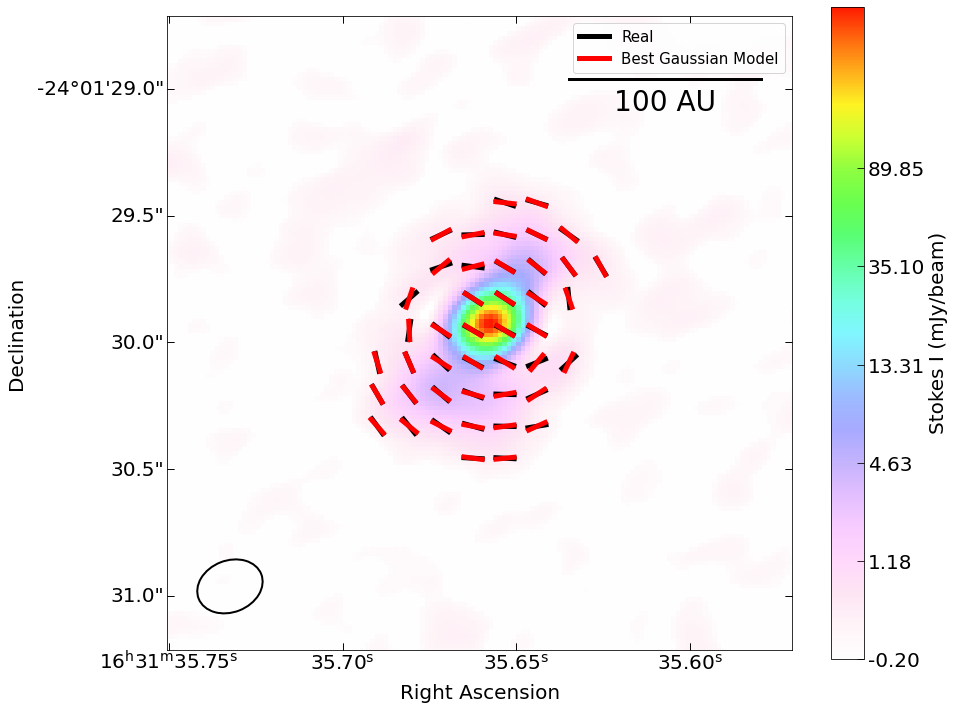

In [36]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)
